In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
import os

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image

In [2]:
os.listdir('D:/ML_Data/tomato_leafs/New Plant Diseases Dataset(Augmented)')

['train', 'valid']

In [3]:
disease_list = os.listdir('D:/ML_Data/tomato_leafs/New Plant Diseases Dataset(Augmented)/train')
disease_list

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [4]:
train_dir = 'D:/ML_Data/tomato_leafs/New Plant Diseases Dataset(Augmented)/train'
validation_dir = 'D:/ML_Data/tomato_leafs/New Plant Diseases Dataset(Augmented)/valid'

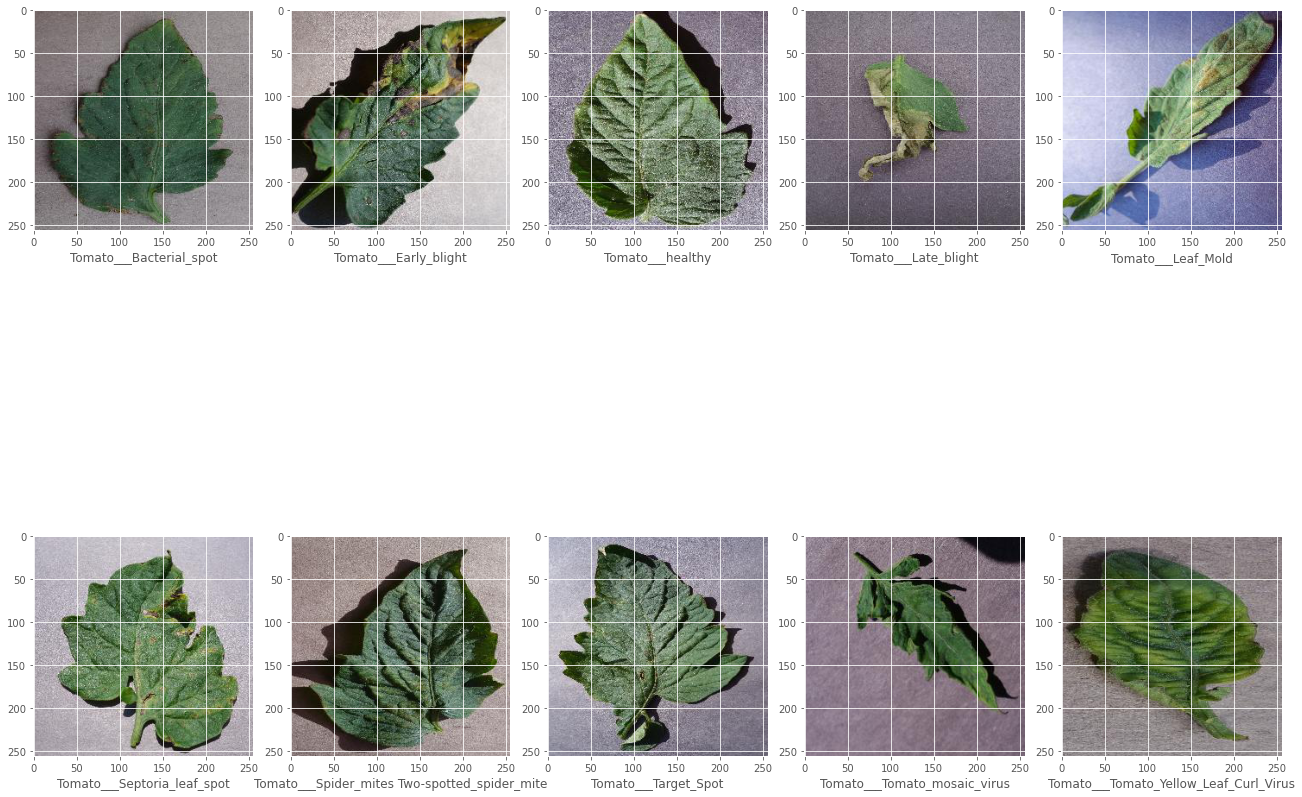

In [5]:
fig = plt.figure(figsize = (12, 9))
fig.set_size_inches(18, 18)
plt.style.use('ggplot')
i = 0
leaf = []
disease_name = []
leaf_img = []

for disease in disease_list:
    sample = random.sample(os.listdir(train_dir + '/' + disease), 1)
    leaf.append(sample)
    disease_name.append(disease)
    
for image in leaf:
    leaf_img.append(image[0]) 
    
i = 0    
for image in leaf_img:
    img = load_img(train_dir + '/' +disease_name[i]+ '/' + image)
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.xlabel(disease_name[i])
    i = i + 1
plt.tight_layout()

^ Sample images + labels

In [6]:
image_height = 224
image_width = 224

In [20]:
tr_datagen  = ImageDataGenerator(rescale = 1/255., zoom_range = 0.2, shear_range=0.2, horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_datagenerator = tr_datagen.flow_from_directory(directory = train_dir,target_size=(image_width , image_height), class_mode ="categorical",batch_size=32)

validation_datagenerator = val_datagen.flow_from_directory(directory = validation_dir,target_size=(image_width , image_height), class_mode="categorical",batch_size=32)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [21]:
inceptionv3_arch = InceptionV3(weights = 'imagenet',include_top = False,input_shape = (224,224,3))

In [22]:
inceptionv3_arch

In [23]:
for layers in inceptionv3_arch.layers:
    layers.trainable = False

In [24]:
out = inceptionv3_arch.output
out = Flatten()(out)

In [25]:
out

<tf.Tensor 'flatten_2/Identity:0' shape=(None, 51200) dtype=float32>

In [26]:
predictions = Dense(10,activation = "softmax")(out)
model = Model(inputs = inceptionv3_arch.input, outputs = predictions)

In [19]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [20]:
model.compile(optimizer ="adam",loss = "categorical_crossentropy",metrics =["accuracy"])

history = model.fit_generator(generator = train_datagenerator,steps_per_epoch = len(train_datagenerator),
                              validation_data = validation_datagenerator,validation_steps = len(validation_datagenerator),
                             epochs = 10,verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 574 steps, validate for 144 steps
Epoch 1/10
 11/574 [..............................] - ETA: 8:43 - loss: 3.2414 - accuracy: 0.6062

KeyboardInterrupt: 

In [32]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1026837155357929448
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5077532672
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2276134980854906816
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [ ]:
fit